### Summary: 
This project is an **implementation of LDA topic modelling** with ‘million ABC news headlines’ dataset. This project is an **extended work based on my previous notebook**. In the previous notebook, I implemented the tf/tfidf on the trigram phrases, which has achieved good result. In this work, an LDA topic model will be built, and further analysis will be made. 

### Key question and problem space:
**'Media trust' towards mainstream media** has long been a controversial topic, not only for marketers and researchers, but also for the public audience. For example, some mainstream media are considered to be controlled by business or political groups that are used to manipulate people’s opinions, which has raised public’ concern regarding the reliability, trustworthy of media companys. 

**ABC News is a public news service in Australia** produced by the News and Current Affairs division of the Australian Broadcasting Corporation, which is owned and funded by the Australian Government.By investigating the published news titles of the past 10 years, we could gain an overview about the national conversation and top topics among the past decade. This could **help our stakehoders to gain useful insights regarding ABC News and their service**, perhaps, help them to make judgement about the reliability and trustworthy. 

### Dataset: 
Dataset used here is **'million ABC news headlines'** sources from https://www.kaggle.com/therohk/million-headlines. A million news headlines and its published date are provided in this dataset from 2003 until 2020.

### Question:
 
 What were the **top Australian news topics** over the last decade, and what can these say about the **national conversation** as well as the reliability and trustworthy of ABC news?

### Methodology:
To achieve our goal, firstly, **a tf/tfidf model** will be built based on **tri-gram phrases** with python scikit-learn library, then a **topic modelling technique** will be applied. Topic modelling can be described as a method for finding a group of words (i.e topic) from a collection of documents that best represents the information in the collection. In this project, the **LDA (Latent Dirichlet allocation )** will be chosen as the techniques for our topic. The **evaluation and visualization** will be also given.

### Key Findings: 
- Through the tf /tfidf model on trigram, we are able to **extract the top 100 associated phrases** from the dataset. These phrases provide useful insights on the **top ranked events** from past 10 years. 
- Through LDA topic modelling, we are able to find **11 national topics**. We then **assigned the dominated topic to each headline**, calculated the **distribution of the 11 topics** among the dataset. This gives us an overview of the national conversation from the last ten years.


**This rest of project is organized as follows:** 
- The First part is the Exploratory Data Analysis. 
- The second part is the implementation of tf/tfidf on trigrams. 
- Finally, the third part is the implementation of LDA topic model.

### Part 1 - Exploratory Data Analysis

In [130]:
#Import the library for data manipulation and plot
import pandas as pd               
import matplotlib.pyplot as plt  
import datetime

In [135]:
#read the csv file
My_news_tilte = pd.read_csv('abcnews-date-text.csv', sep = ',', parse_dates=[0], infer_datetime_format=True)
print(My_news_tilte.head())
My_news_tilte.info()
#[1186018 rows x 2 columns] 

  publish_date                                      headline_text
0   2003-02-19  aba decides against community broadcasting lic...
1   2003-02-19     act fire witnesses must be aware of defamation
2   2003-02-19     a g calls for infrastructure protection summit
3   2003-02-19           air nz staff in aust strike for pay rise
4   2003-02-19      air nz strike to affect australian travellers
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186018 entries, 0 to 1186017
Data columns (total 2 columns):
publish_date     1186018 non-null datetime64[ns]
headline_text    1186018 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 18.1+ MB


### Data cleanning
- From the dataset we can see that, this dataset is **incredibly large**(18.1+MB, more than 1 billion rows), the headline_text is started from 2003. Since we only interested about news of the last 10 years, the first thing we need is to **extract the data for only 2010-2019**. 

In [136]:
#We can use datetime to extract the decade news titles 
decade_data = My_news_tilte[My_news_tilte['publish_date'].dt.year >= 2010]
decade_data

,publish_date,headline_text
510305,2010-01-01,12m degas stolen from museum
510306,2010-01-01,17 die in bangladesh bus crash
510307,2010-01-01,2010 to be drier after very wet 2009
510308,2010-01-01,37 catholic workers killed worldwide
510309,2010-01-01,600 hurt in philippine new year revelry
...,...,...
1186013,2019-12-31,vision of flames approaching corryong in victoria
1186014,2019-12-31,wa police and government backflip on drug amne...
1186015,2019-12-31,we have fears for their safety: victorian premier
1186016,2019-12-31,when do the 20s start


### Analysis
The 10 years data is still quite big(more than 675k rows), this may cause difficulty for the later analysis with tf or tfidf, since the weight of single terms can hardly give us useful information among such a big dataset. 

Before finding ways to **reduce the data dimension**, first, let's **take a look at the distribution of headlines within last decade**. 


In [137]:
#first resample the date to arrange them according to years 
reindexed_data = decade_data['headline_text']
reindexed_data.index = decade_data['publish_date']

yearly_counts = reindexed_data.resample('A').count()
monthly_counts = reindexed_data.resample('M').count()

# check the average count of montly news and yearly news 
print(monthly_counts.mean())
print(yearly_counts.mean())


5630.941666666667
67571.3


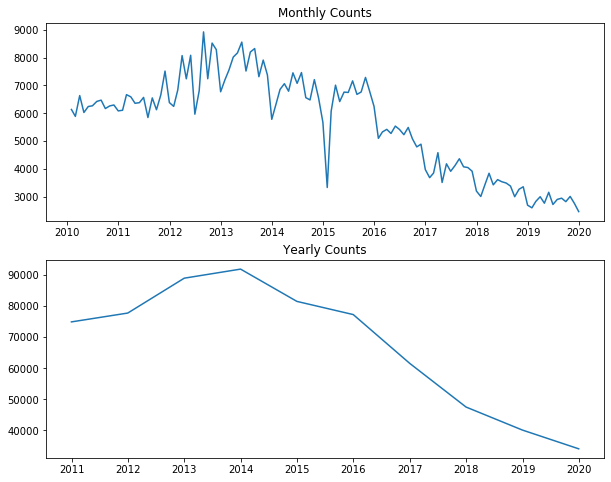

In [138]:
fig, ax = plt.subplots(2, figsize=(10,8))
ax[0].plot(monthly_counts)
ax[0].set_title('Monthly Counts')
ax[1].plot(yearly_counts);
ax[1].set_title('Yearly Counts')
plt.show()

### Analysis
- The **mean values** of the news title in a year and a month is **5630 and 67571** respectively. 
- From the two histgram above, we can see that the **distribution of the dataset is not even at all**.
- Since we are interested about the top topics of the past ten years, but **it's unlikely to apply the functions in such a big dataset**. Thus, we could **create a random data sample** which is 10% of the past ten years dataset. **we assume that this random sample data is representative enough of the decade news titles**. 

In [139]:
# Here we get random 10% data of the decade newstitle as our sample
# The sample size is same as the mean of yearly news titles
sample_title = decade_data.sample(frac=0.1, replace=True, random_state=1)
print(sample_title.head())
sample_title.shape[0]
sample_title

        publish_date                                      headline_text
638342    2011-09-10      japanese minister resigns over radiation joke
1002060   2015-12-26                               boxing day test wrap
981229    2015-09-25  canberra teen sentenced to jail over jewellery...
1001568   2015-12-22                            vinnies illegal dumping
881708    2014-06-15                       interview marcus bontempelli


,publish_date,headline_text
638342,2011-09-10,japanese minister resigns over radiation joke
1002060,2015-12-26,boxing day test wrap
981229,2015-09-25,canberra teen sentenced to jail over jewellery...
1001568,2015-12-22,vinnies illegal dumping
881708,2014-06-15,interview marcus bontempelli
...,...,...
976290,2015-09-03,grandstand thursday september 3
795720,2013-06-18,china launches its first carbon trading scheme
705566,2012-07-02,abuse victims speak of navy base violence
647039,2011-10-23,all blacks win will seal the deal for key


### Part 2- Implementation of tf and tf`idf on Trigram
-Tf defines the term frequency and tfidf show the weight of the certain term in the dataset, by using these two metric, we are able to know the most weighted terms in our dataset.
- Trigram is selected here as the best length of pharase as it won't increase the data dimension too much.

In [140]:
#import libraries
import numpy as np
# the preprocessing will be done in scikit-learn vecterizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 


In [141]:
# define the help function to get top n vectors and make plot

def get_top_n_vectors(vectorizer, text, n):
    # This function takes vectorizer, text and top n numbers of vectors as input
    # The output will be a sorted dateframe(with the top n vectors weight in ascending orders) with two columns: term and weight
    
    X = vectorizer.fit_transform(text)
    print(X.shape)
    weight = np.asarray(X.mean(axis=0)).ravel().tolist()
    weight_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'weight': weight})
    sorted_df = weight_df.sort_values(by='weight', ascending=False).head(n)
    return sorted_df


def plot_top_n_vectors(sorted_df):
    # This function takes a sorted dataframe as input then give a plot of top n weighted vectors
    plt.figure(figsize=(20,4))
    plt.plot(sorted_df['term'],sorted_df['weight'])
    plt.xticks(sorted_df['term'] ,rotation='vertical')
    plt.show()

In [142]:
# this is for trigram in a tf.idf vecterizer
trigram_tf_vectorizer = CountVectorizer(ngram_range=(3, 3))
trigram_tfidf_vectorizer= TfidfVectorizer(ngram_range =(3, 3))

(67571, 273350)


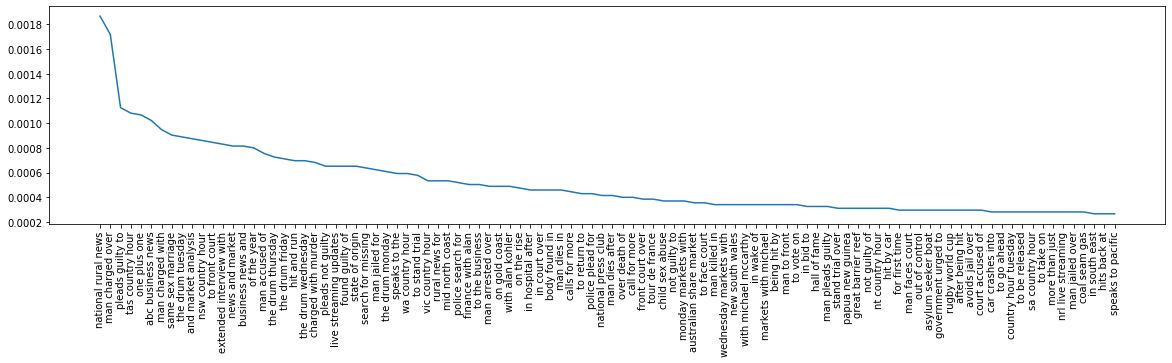

                       term    weight
155925  national rural news  0.001865
143236     man charged over  0.001717
182556     pleads guilty to  0.001125
230625     tas country hour  0.001080
171362         one plus one  0.001066
...                     ...       ...
143486      man jailed over  0.000281
50640         coal seam gas  0.000281
120146        in south east  0.000266
111594         hits back at  0.000266
220126    speaks to pacific  0.000266

[100 rows x 2 columns]
(67571, 273350)


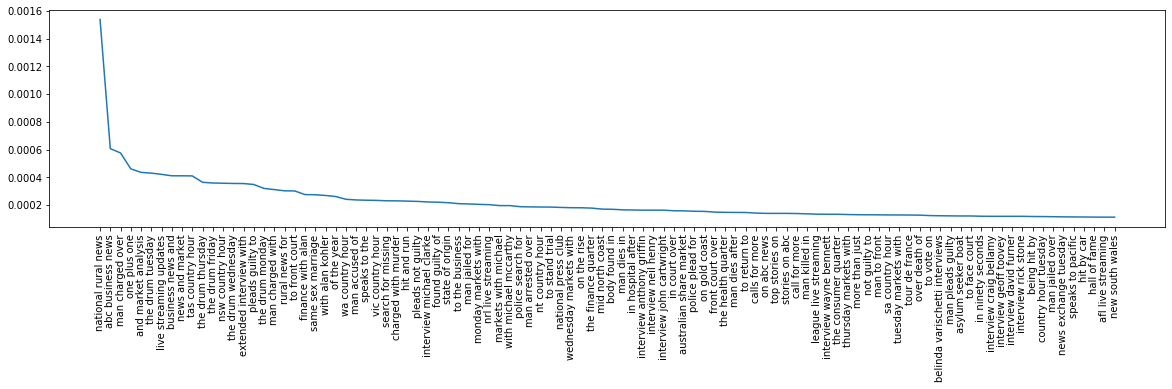

                       term    weight
155925  national rural news  0.001538
2729      abc business news  0.000607
143236     man charged over  0.000575
171362         one plus one  0.000461
12613   and market analysis  0.000435
...                     ...       ...
220126    speaks to pacific  0.000114
111377           hit by car  0.000113
106159         hall of fame  0.000113
6389     afl live streaming  0.000112
158170      new south wales  0.000112

[100 rows x 2 columns]


In [143]:
# call the function
sorted_trigram = get_top_n_vectors(trigram_tf_vectorizer, sample_title['headline_text'], 100)
plot_top_n_vectors(sorted_trigram)
print(sorted_trigram)

sorted_trigram2 = get_top_n_vectors(trigram_tfidf_vectorizer, sample_title['headline_text'], 100)
plot_top_n_vectors(sorted_trigram2)
print(sorted_trigram2)

### Analysis 
- After applying tri-gram on sample dataset, we are able to print the top 100 ranked grams.
- **'Same sex marriage'** is a high ranked topic. This is because Australia legalised same-sex marriage in December 2017, which has caused a heated discussion among the nation.

- **'Social news'** is also a widely discussed topic, this can be seen from the high ranked terms such as **'not guilty to','man killed in','being hit by','police','ctash','murder' etc**. 

- **'Business news'** is another hot topic within past decade, indicated by high ranked term **'the consumer quarter', 'market analysis', 'finance with alan' etc**.

- high ranked tri-gram such as **'one plus one', 'the drum ', 'Tas country hour', 'National press club ' are the names of TV/broadcast programmes owned by ABC News.** These phrases are actually not adding much value to the reader's insight. To get rid of these less useful terms, a **customized stop words list** can be added at pre-processing.


### Part3 - Implementation of LDA topic models in Gensim

- Though **tri-gram works well** on our sample dataset, it has **greatly increased the dimension**  compare with single terms. **It is unrealistic to apply tri-gram on the whole dataset**. 

- To further reduce the dimension and make the topics clear, a **topic model** would be a better option, here **LDA (Latent Dirichlet allocation) will be choosen** as our approach. 




In [144]:
import sys
!{sys.executable} -m pip install gensim

In [145]:
# Import gensim pakage
import gensim
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
#import pyLDAvis
#import pyLDAvis.gensim
import gensim.corpora as corpora

### Data preprocessing
- Since we want to custimize the stopwords, we create a function naming 'clean_txt' for pre-processing.

In [146]:
pip install nltk 

Note: you may need to restart the kernel to use updated packages.


In [147]:
import re #for tokenization
import nltk #nlp library for stop-words
import string #for punctuation (in case there's any)

In [148]:
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')
stopword.extend(['one plus one', 'the drum ', 'Tas country hour', 'National press club '])# add customized stopwords
ps = nltk.PorterStemmer() #for stemming tokens to reduce variations of tokens

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [149]:
def clean_txt(text):
    ## define the functions to pre-process the text, this will be used as analyzer in our vectorizer
    #This function takes a list of text as input, output a list of clean tokens
    # The clean process includes convert to lower case, remove punctuation, tokenization, stop-word removal(from the default sk learn stopword list)and stemmeing, a porter stemmer was used here. 

    text = "".join([word.lower()for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopword]
    return text

In [150]:
# Preprocess the text to get clean tokens with our self-defined preprocessing function: clean_txt
sample_title['clean_tokens'] = sample_title['headline_text'].apply(lambda x:clean_txt(x) )
sample_title.head()

,publish_date,headline_text,clean_tokens
638342,2011-09-10,japanese minister resigns over radiation joke,"[japanes, minist, resign, radiat, joke]"
1002060,2015-12-26,boxing day test wrap,"[box, day, test, wrap]"
981229,2015-09-25,canberra teen sentenced to jail over jewellery...,"[canberra, teen, sentenc, jail, jewelleri, sto..."
1001568,2015-12-22,vinnies illegal dumping,"[vinni, illeg, dump]"
881708,2014-06-15,interview marcus bontempelli,"[interview, marcu, bontempelli]"


In [151]:
#construct the dictionary and corpus for gensim lda model
id2word = corpora.Dictionary(sample_title['clean_tokens'])

#convert corpus to BoW format
corpus = [id2word.doc2bow(token) for token in sample_title['clean_tokens']]  


In [152]:
# set up lda model, start with 10 topics
# since we have an extreme large dataset, a multicore lda model with worker = 3 is choosen for effective running

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       workers=3,
                                       random_state=100,
                                       passes=10,
                                       per_word_topics=True)
# print the topics for lda model 
lda_model.print_topics()

[(0,
  '0.011*"chang" + 0.011*"health" + 0.011*"new" + 0.011*"say" + 0.010*"mine" + 0.008*"trump" + 0.008*"servic" + 0.007*"commun" + 0.007*"get" + 0.007*"minist"'),
 (1,
  '0.024*"interview" + 0.015*"rural" + 0.012*"cut" + 0.012*"nation" + 0.011*"price" + 0.011*"budget" + 0.010*"elect" + 0.010*"feder" + 0.009*"govern" + 0.009*"fund"'),
 (2,
  '0.012*"hit" + 0.009*"run" + 0.008*"land" + 0.008*"cattl" + 0.007*"street" + 0.007*"demand" + 0.007*"australia" + 0.006*"export" + 0.006*"northern" + 0.006*"race"'),
 (3,
  '0.022*"market" + 0.017*"miss" + 0.016*"abc" + 0.012*"close" + 0.012*"busi" + 0.012*"share" + 0.011*"record" + 0.011*"search" + 0.009*"speak" + 0.008*"adelaid"'),
 (4,
  '0.014*"nsw" + 0.013*"arrest" + 0.012*"state" + 0.009*"attack" + 0.008*"say" + 0.008*"abbott" + 0.007*"give" + 0.007*"violenc" + 0.007*"australian" + 0.007*"royal"'),
 (5,
  '0.016*"school" + 0.012*"year" + 0.011*"new" + 0.011*"sydney" + 0.011*"centr" + 0.009*"road" + 0.008*"plan" + 0.008*"student" + 0.008*"sa

### Evaluation 
- Since the LDA model is built, there has to be **a metric to evaluate how good the model is**. There are generally 2 metrics to evaluate a LDA model, naming **Perplexity and Coherence Score**.
- **Perplexity** is a statistical measure of how well a probability model predicts a sample, lower the better.
- **Coherence Score** - Is defined as the average / median of the pairwise word-similarity scores of the words in the topic, higher the better.

In [154]:
# Evaluate the model coherence score 
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=sample_title['clean_tokens'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

print('Coherence Score: ', coherence_lda)
print('\nPerplexity: ', lda_model.log_perplexity(corpus)) 

# Coherence Score:  0.3318081099095024 this will be the baseline 

Coherence Score:  0.3213475423773927

Perplexity:  -9.048347846260961


### Parameter selection 

- We mow have the coherence score of **10 topics as baseline**, We then want to perform a series of tests to help determine the most suitable number of N topics.
- The common approach is to **measure and compare the topic coherence of models** generated for **different values of N**.
- From the ABCNews website https://www.abc.net.au/news/ we find that there are 8 topics at the navigation bar, **we assume the best number can be found between 6-12**. 

In [153]:
# supporting function for testing coherence score 

def get_coherence_score(corpus,id2word,N):
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=N, 
                                       workers=3,
                                       random_state=100,
                                       passes=10,
                                       per_word_topics=True)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=sample_title['clean_tokens'], dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print('Coherence Score: ', coherence_lda)


In [ ]:
# Warning!!!!!!!!!
#The following function takes long to run

# we assume the most suit can be found around 8
X = range(6,13)
for N in X:
    get_coherence_score(corpus, id2word, N)
   

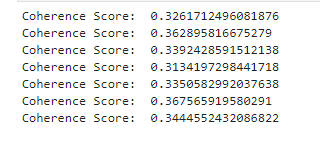

In [170]:
# the output example as follows 
from IPython.display import Image
Image(filename = 'output1.PNG',width = 300)

### Analysis
- After several runs of the above funtion, **N=11 was found output the highest coherence score**.
- We then put number N=11 into our lda model 

In [ ]:
lda_model2 = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=11, 
                                       workers=3,
                                       random_state=100,
                                       passes=10,
                                       per_word_topics=True)

doc_topics = lda_model2.print_topics()
doc_topics

### Visualization
- We want to observe the terms in our 11 topics, this helps our stakeholders to gain a view about the topics.
- For a clear visualization, we **plot the terms in wordcloud** in correspond with its weight in each topics(**bigger terms, higher weight**). 

In [127]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [128]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud

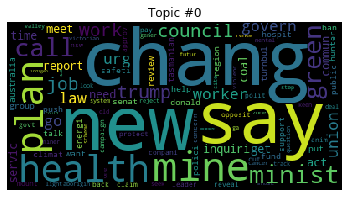

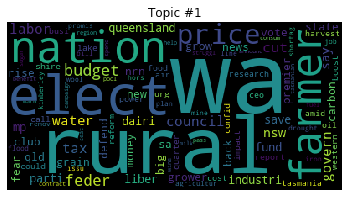

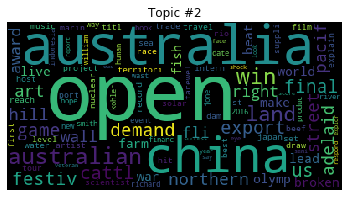

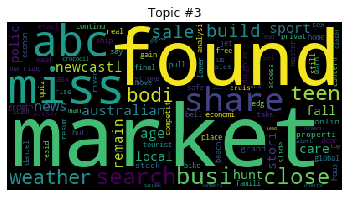

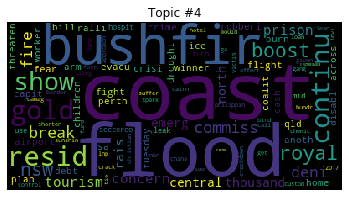

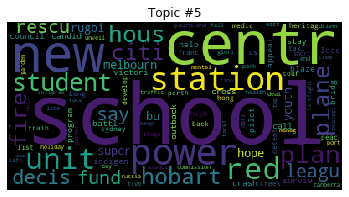

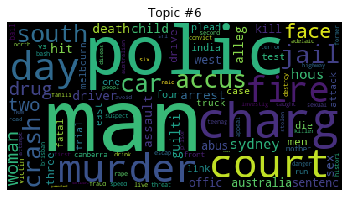

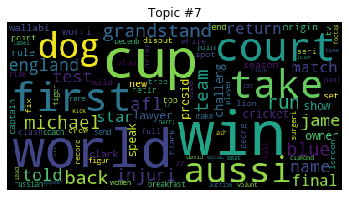

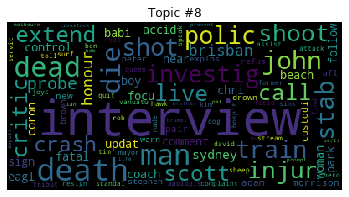

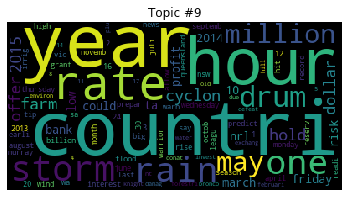

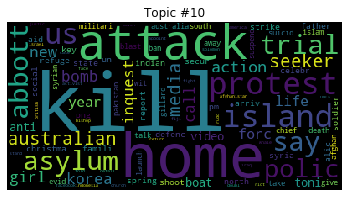

In [129]:
for t in range(lda_model2.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(lda_model2.show_topic(t, 100))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()


### Analysis: 

- From the 11 topics, we could see that, **some of them performs quite well**, for example, topic  #2(international news between countries), topic #4 (bush fire and flood), topic #6(social news: police, charge. murder, court), these terms in the topics are semantically related. 

- Most of topics contains **more or less noisy terms**, and also some topics are **hard to interpret **(i.e., Topic 1, 8 and Topic 9).

- However, since we are intersted to know the 'top news topics' over the decade, it is more meaningful to see the **distribution of topics over the years**. To achieve this, we want to assign the topics to each news title.

### Topic Distribution 
- LDA model estimates the probabilities of each topic belongs to certain documents(newstitle). For short news titles, we assme it is unlikely to belong to two different topics. 
- Thus we define the function to extract the first topic for each newstitle with highest probabiliy, then we can explore the disctribution among the dataset. 

In [155]:
# try out the function first 
# get the probabilities of 11 topics for the first newstitle
# the key of the output is the topic number followed by the probability 
doc_topics = lda_model2.get_document_topics(corpus[0])
# Sort the probability in decending order 
doc_topics.sort(key = lambda x: x[1], reverse= True)
doc_topics

[(8, 0.38081154),
 (1, 0.26507655),
 (0, 0.23281991),
 (10, 0.015163208),
 (2, 0.015161313),
 (3, 0.015161249),
 (4, 0.015161249),
 (5, 0.015161249),
 (6, 0.015161249),
 (7, 0.015161249),
 (9, 0.015161249)]

In [156]:
# apply this funtion on all newstitles and count the distribution of each topics. 
count_topics=[]
for i in range(len(corpus)):
    doc_topics = lda_model2.get_document_topics(corpus[i])
    doc_topics.sort(key = lambda x: x[1], reverse= True)
    #print(doc_topics[0][0]) 
    count_topics.append(doc_topics[0][0])

# count the frequency of the 11 topics in out dataset, then we can get the most frequent talked topics
result = np.unique(count_topics, return_counts=True)
result
    

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([10081,  7187,  6087,  4700,  4482,  5248,  8693,  5174,  4862,
         4755,  6302]))

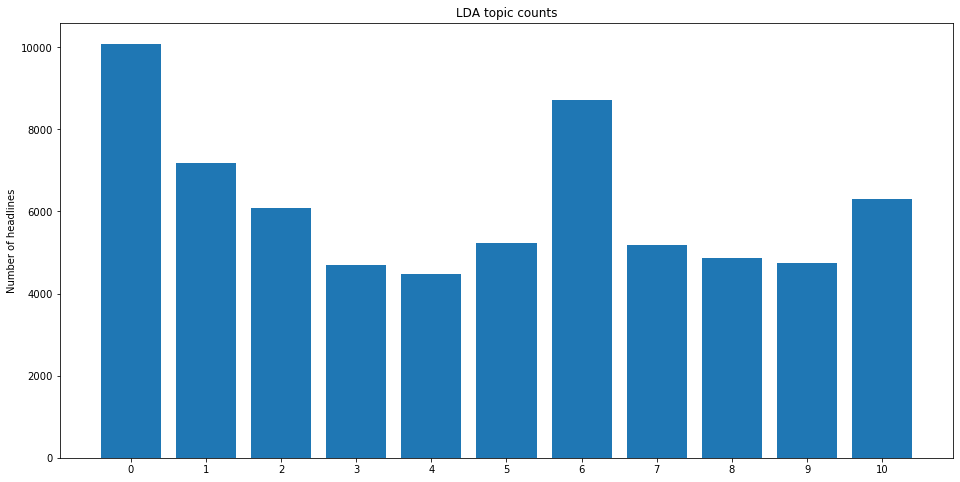

In [126]:
# plot the frequency of dominated topics in our dataset.
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(result[0], result[1]);
ax.set_xticks(result[0]);
ax.set_title('LDA topic counts');
ax.set_ylabel('Number of headlines');

### Insights
- Now we can see the distribution of the 11 topics across our newstitle dataset as above. It is clear that the proportion of topic # 0 and topic# 6 are highest. These two topics are mainly about the social news (indicated by keywords: health, police, court, charge. murder), While the rest of topics are relatively evenly distributed in our dataset. This distribution seems reasonable. 

- The results of our LDA topics are consistent with tf/idf trigram model, while trigram model tells more on specific events, LDA gives more general information regarding topics. 

- Overall, it helps us to achieve the goal by giving the 11 general national topics and 100 top ranked phrases, howerver, to help our stakeholder gain more insights regarding the reliability and trustworth of ABC news, further analysis are needed. 

### Critical Analysis 

- In our LDA model, '11' were tested as the most suitable number, but as we **didn't apply the functions on the whole dataset** (due to the limitation of computating power), this **result may be biased**. 

- The result of our LDA models itself is **not straightforward**, since the unstructed human language data is sparsly distributed, which **requires more human intepretion**. 

- When compare the tf/tfidf model with LDA, we can say that sometimes **simple model achieves better result**. it more depends on what our business concern is. 

- Topic modelling provides us **an effective way to manipulate large scale unstructed dataset** that won't able to be achieved by humam labours. However, it can cause some **ethic issues** such as the **collection of user data**, the **insufficient understanding of the hidden michanism and the algorithm**. This all require **careful consideration for decision makers**. 

### References:
https://www.kaggle.com/rcushen/topic-modelling-with-lsa-and-lda
https://medium.com/mlreview/topic-modeling-with-scikit-learn-e80d33668730
https://www.kaggle.com/akashram/topic-modeling-intro-implementation
